## 변수선택법을 통한 다중회귀분석 실습

In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
#현재경로 확인
os.getcwd()

'C:\\Users\\mitha\\OneDrive\\바탕 화면\\dev\\My_First_ML\\Regression_Analysis'

In [3]:
#데이터 불러오기
corolla=pd.read_csv('C:/Users/mitha/OneDrive/바탕 화면/ToyotaCorolla.csv')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
#데이터 수와 변수의 수 확인하기
corolla.info()
nCar=corolla.shape[0]
nVar=corolla.shape[1]
print(nCar, nVar)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

## 범주형 변수를 이진형 변수로 변환

In [13]:
#가변수 생성
corolla.Fuel_Type.unique()
dummy_p=np.repeat(0,nCar)
dummy_d=np.repeat(0,nCar)
dummy_c=np.repeat(0,nCar)

In [14]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
#인덱스 슬라이싱 후 binary=1 대입
p_inx=corolla.Fuel_Type=='Petrol'
d_inx=corolla.Fuel_Type=='Diesel'
c_inx=corolla.Fuel_Type=='CNG'

In [22]:
dummy_p[p_inx]=1
dummy_d[d_inx]=1
dummy_c[c_inx]=1

## 불필요한 변수 제거 및 가변수 추가

In [23]:
Fuel=pd.DataFrame({'Petrol':dummy_p,'Diesel':dummy_d,'CNG':dummy_c})
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [28]:
#흠. 이렇게도 할 수 있지 않나?
FT=corolla['Fuel_Type']
FT=pd.get_dummies(FT)#ㅋㅋ루

In [32]:
corolla_=corolla.drop(['Id','Model','Fuel_Type'],axis=1)
mlr_data=pd.concat((corolla_,FT),1)
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,CNG,Diesel,Petrol
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [34]:
#bias 추가
mlr_data2=sm.add_constant(mlr_data,has_constant='add')
mlr_data2.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,CNG,Diesel,Petrol
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타겟변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [36]:
feature_columns=mlr_data2.columns.difference(['Price'])#Price와 다른 컬럼 분리

In [38]:
X=mlr_data2[feature_columns]
y=mlr_data2['Price']
train_x,test_x,train_y,test_y=train_test_split(X,y,train_size=0.7,test_size=0.3)
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [39]:
#Train the MLR / 회귀모델 적합
full_model=sm.OLS(train_y,train_x)
fitted_full_model=full_model.fit()

In [40]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     302.8
Date:                Mon, 21 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:59:49   Log-Likelihood:                -8451.8
No. Observations:                1005   AIC:                         1.697e+04
Df Residuals:                     971   BIC:                         1.714e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -388.8611    133.305     -2.917      0.004    -650.460    -127.262
Age_08_04         -114.1702      4.163    -27.427      0.000    -122.339    -106.001
Airbag_1           211.6288    267.334      0.792      0.429    -312.990     736.248
Airbag_2            27.7273    137.870      0.201      0.841    -242.830     298.285
Airco              317.7302     95.146      3.339      0.001     131.015     504.446
Automatic          379.6266    162.627      2.334      0.020      60.485     698.768
Automatic_airco   2796.6723    195.037     14.339      0.000    2413.929    3179.415
BOVAG_Guarantee    299.1046    134.577      2.223      0.026      35.009     563.200
Backseat_Divider  -268.1357    136.186     -1.969      0.049    -535.388      -0.883
Boardcomputer     -123.9456    126.151     -0.983      0.326    -371.506     123.615
CD_Player          314.1837    104.518      3.006      0.003     109.076     519.291
CNG               -958.7241    250.174     -3.832      0.000   -1449.669    -467.780
Central_Lock        -6.7852    152.160     -0.045      0.964    -305.386     291.815
Cylinders           -0.0296      0.002    -12.681      0.000      -0.034      -0.025
Diesel              85.6572    192.450      0.445      0.656    -292.009     463.324
Doors               75.0837     42.444      1.769      0.077      -8.209     158.376
Gears              349.2813    227.465      1.536      0.125     -97.098     795.660
Guarantee_Period    52.5497     14.408      3.647      0.000      24.276      80.824
HP                  15.1854      3.950      3.845      0.000       7.435      22.936
KM                  -0.0175      0.001    -13.084      0.000      -0.020      -0.015
Met_Color            6.0230     79.818      0.075      0.940    -150.613     162.659
Metallic_Rim       203.1245     99.679      2.038      0.042       7.514     398.735
Mfg_Month          -87.7109     10.785     -8.133      0.000    -108.876     -66.546
Mfg_Year             1.9706      0.884      2.229      0.026       0.235       3.706
Mfr_Guarantee      272.1313     78.466      3.468      0.001     118.150     426.113
Mistlamps         -158.3762    116.801     -1.356      0.175    -387.587      70.835
Petrol             873.0595    211.684      4.124      0.000     457.649    1288.470
Power_Steering    -199.4201    299.607     -0.666      0.506    -787.373     388.533
Powered_Windows    354.2163    150.859      2.348      0.019      58.168     650.264
Quarterly_Tax       12.5877      1.961      6.419      0.000       8.740      16.436
Radio              603.1570    806.154      0.748      0.455    -978.849    2185.163
Radio_cassette    -785.7672    806.772     -0.974      0.330   -2368.986     797.451
Sport_Model        281.9454     92.420      3.051      0.002     100.579     463.311
Tow_Bar           -218.

## VIF를 통한 다중공선성 확인

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(mlr_data2.values,i)for i in range(mlr_data2.shape[1])]
vif["features"]=mlr_data2.columns
vif
#vif 추출

C:\Users\mitha\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\mitha\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


- 다른 값으로 이를 설명할 수 있다해서(다중공선성) 삭제하기엔 p-value가 굉장히 유의미하다
- 주관적인 판단으로 제거 여부 판단(지금은 inf 값을 삭제하지 않는다.)

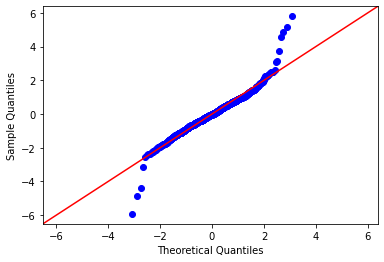

In [43]:
#학습데이터의 잔차 확인
res=fitted_full_model.resid
# q-q plot / 정규분포 확인
fig=sm.qqplot(res,fit=True,line='45')

- 이정도면 ok라고 할 수 있는 잔차이다. 원래 끝쪽은 몇 개 내려가거나 올라가는 경향이 있음

Text(0, 0.5, 'Redisual')

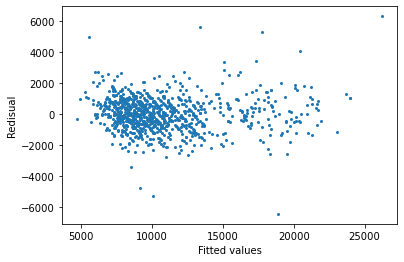

In [47]:
#residual pattern 확인
pred_y=fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
fig=plt.scatter(pred_y,res,s=4)
#plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Redisual')

In [48]:
#검증 데이터에 대한 예측
pred_y2=fitted_full_model.predict(test_x)

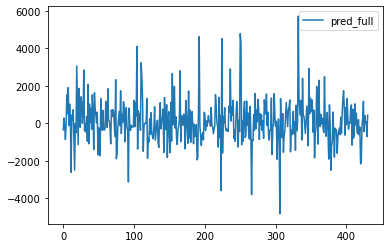

In [49]:
#잔차 plot
plt.plot(np.array(test_y-pred_y2),label='pred_full')
plt.legend()
plt.show()

In [50]:
#MSE 성능
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=test_y,y_pred=pred_y2)

1353724.3111141834

## 변수선택법

In [53]:
def processSubset(X,y,feature_set):
    model=sm.OLS(y,X[list(feature_set)])#모델링
    regr=model.fit()#모델 학습
    AIC=regr.aic #모델의 AIC
    return {'model':regr,'AIC':AIC}
print(processSubset(X=train_x,y=train_y,feature_set=feature_columns[:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001AEA39AA8B0>, 'AIC': 19036.607311237432}


In [55]:
#모든 조합을 고려하여 가장 효율이 좋은 조합을 찾아내는 코드
import time
import itertools
#getBest : 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic=time.time()#시작시간
    results=[]#결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']),k):#각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))#모델링 된 정보를 리스트에 저장
    models=pd.DataFrame(results)#데이터 프레임 변환
    #가장 낮은 AIC 가지는 모델 선택
    best_model=models.loc[models['AIC'].argmin()]
    toc=time.time()#종료시간
    print('Processed ',models.shape[0],'models on',k,'predictors in',(toc-tic),'seconds.')
    return best_model
print(getBest(X=train_x,y=train_y,k=2))

Processed  630 models on 2 predictors in 0.8237967491149902 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17460.504696
Name: 211, dtype: object


In [56]:
#변수 선택에 따른 학습시간과 저장
models=pd.DataFrame(columns=['AIC','model'])
tic=time.time()
for i in range(1,4):
    models.loc[i]=getBest(X=train_x,y=train_y,k=i)
toc=time.time()
print('Total elapsed time:',(toc-tic),"seconds.")

Processed  36 models on 1 predictors in 0.05285835266113281 seconds.
Processed  630 models on 2 predictors in 0.7599670886993408 seconds.
Processed  7140 models on 3 predictors in 9.4443838596344 seconds.
Total elapsed time: 10.443220138549805 seconds.


In [58]:
models.loc[3,'model'].summary() #접근을 통해 정보확인

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     2164.
Date:                Mon, 21 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:26:23   Log-Likelihood:                -8658.4
No. Observations:                1005   AIC:                         1.732e+04
Df Residuals:                    1001   BIC:                         1.734e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Automatic_airco  3863.7810    198.099     19.504      0.000    3475.043    4252.519
KM                 -0.0157      0.001    -12.128      0.000      -0.018      -0.013
Mfg_Year         1612.8312     33.724     47.824      0.000    1546.653    1679.009
const           -3.214e+06   6.75e+04    -47.628      0.000   -3.35e+06   -3.08e+06
==============================================================================
Omnibus:                      142.878   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1067.817
Skew:                           0.399   Prob(JB):                    1.34e-232
Kurtosis:                       7.986   Cond. No.                     1.26e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R squared가 0.5정도 줄어들었지만, 모든 변수를 한 것에 비해 굉장히 최적화가 잘 되어있음을 알 수 있다.
- 전체의 AIC도 약간은 늘어났지만, 변수 3개를 이용하여 적합을 시키는 것이 효율이 가장 좋을 것이다.

Text(0, 0.5, 'BIC')

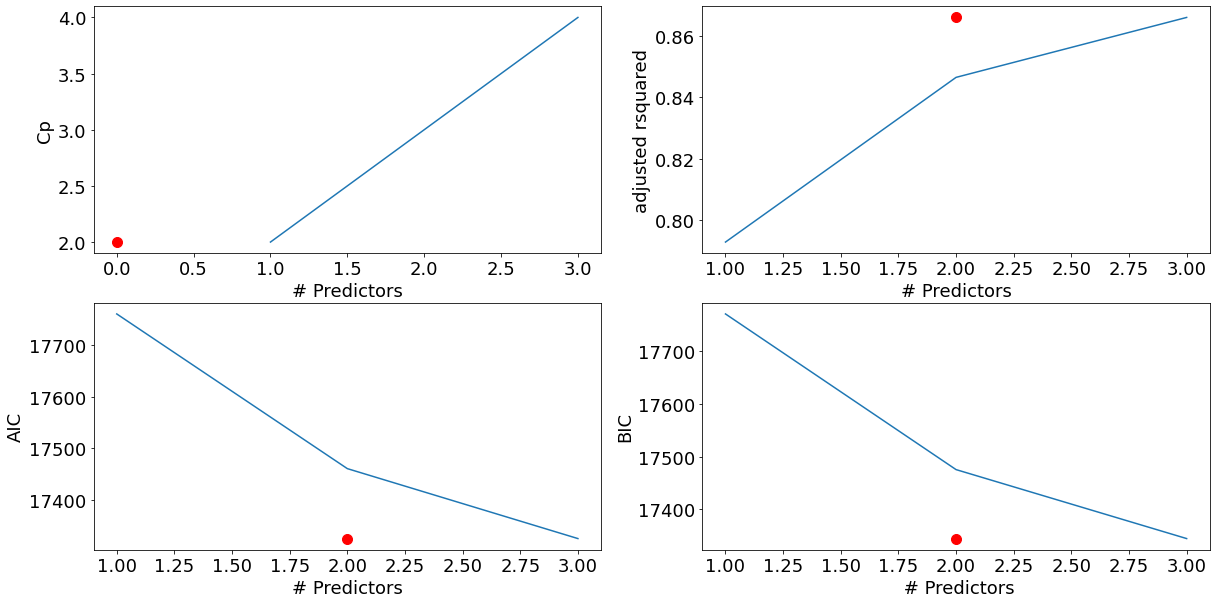

In [59]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

In [60]:
#전진선택법 step=1 : 처음 들어올 변수를 선택하는 함수

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 찾은 result를 이용하여 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [61]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [62]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.06080889701843262
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001AEA95321F0>
Processed  35 models on 2 predictors in 0.049866676330566406
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001AEA9532E50>
Processed  34 models on 3 predictors in 0.03889656066894531
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001AEA9559AF0>
Processed  33 models on 4 predictors in 0.04089069366455078
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001AEA95356D0>
Processed  32 models on 5 predictors in 0.05086541175842285
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM

In [63]:
Forward_best_model.aic

16958.832654387865

- AIC가 별로 차이가 나지 않는데, 시간상으로 굉장히 빨라짐을 알 수 있다.

In [64]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     417.8
Date:                Mon, 21 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:36:08   Log-Likelihood:                -8454.4
No. Observations:                1005   AIC:                         1.696e+04
Df Residuals:                     980   BIC:                         1.708e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1354.0531     39.380     34.384      0.000    1276.774    1431.332
Automatic_airco   2697.4057    181.153     14.890      0.000    2341.913    3052.898
KM                  -0.0176      0.001    -13.305      0.000      -0.020      -0.015
Weight               8.2579      1.261      6.547      0.000       5.783      10.733
Powered_Windows    311.0288     87.857      3.540      0.000     138.620     483.438
HP                  14.6313      3.855      3.795      0.000       7.066      22.196
Quarterly_Tax       12.8377      1.900      6.758      0.000       9.110      16.565
Petrol             838.3644    309.661      2.707      0.007     230.689    1446.039
Guarantee_Period    53.3240     14.039      3.798      0.000      25.775      80.873
Mfr_Guarantee      277.8122     76.915      3.612      0.000     126.876     428.749
Airco              285.3395     90.566      3.151      0.002     107.614     463.065
Sport_Model        326.4708     88.802      3.676      0.000     152.207     500.735
CD_Player          307.0233    101.138      3.036      0.002     108.551     505.495
Tow_Bar           -211.9041     83.029     -2.552      0.011    -374.839     -48.969
ABS               -388.1809    103.870     -3.737      0.000    -592.014    -184.348
CNG              -1015.8153    386.619     -2.627      0.009   -1774.512    -257.119
Mfg_Month           26.5282     10.669      2.486      0.013       5.591      47.465
Automatic          361.4222    160.571      2.251      0.025      46.319     676.525
Metallic_Rim       175.0482     94.516      1.852      0.064     -10.428     360.525
Backseat_Divider  -315.0401    121.414     -2.595      0.010    -553.301     -76.779
BOVAG_Guarantee    299.7631    132.444      2.263      0.024      39.856     559.670
Radio_cassette    -174.1968    105.949     -1.644      0.100    -382.110      33.717
Doors               74.1037     41.970      1.766      0.078      -8.257     156.464
Gears              318.6630    224.641      1.419      0.156    -122.170     759.496
const            -2.711e+06   7.85e+04    -34.528      0.000   -2.86e+06   -2.56e+06
==============================================================================
Omnibus:                      107.870   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.241
Skew:                           0.197   Prob(JB):                    5.41e-158
Kurtosis:                       7.140   Cond. No.                     1.78e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+08. This might indicate that there are
strong multicollinearity or other numerical probl

## 후진소거법

In [65]:
# 후진선택법step=1 : 모든 변수를 다 추가시킨 상태에서 fit
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [66]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [67]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.17054295539855957
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001AEA73CE820>
Processed  35 models on 34 predictors in 0.12865686416625977
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', '

In [68]:
Backward_best_model.aic

16958.83265438788

In [70]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     417.8
Date:                Mon, 21 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:43:58   Log-Likelihood:                -8454.4
No. Observations:                1005   AIC:                         1.696e+04
Df Residuals:                     980   BIC:                         1.708e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -388.1809    103.870     -3.737      0.000    -592.014    -184.348
Age_08_04          -26.5282     10.669     -2.486      0.013     -47.465      -5.591
Airco              285.3395     90.566      3.151      0.002     107.614     463.065
Automatic          361.4222    160.571      2.251      0.025      46.319     676.525
Automatic_airco   2697.4057    181.153     14.890      0.000    2341.913    3052.898
BOVAG_Guarantee    299.7631    132.444      2.263      0.024      39.856     559.670
Backseat_Divider  -315.0401    121.414     -2.595      0.010    -553.301     -76.779
CD_Player          307.0233    101.138      3.036      0.002     108.551     505.495
CNG              -4.081e+04   4908.791     -8.314      0.000   -5.04e+04   -3.12e+04
Cylinders        -4.783e+05   5.88e+04     -8.139      0.000   -5.94e+05   -3.63e+05
Diesel            -3.98e+04   4885.864     -8.145      0.000   -4.94e+04   -3.02e+04
Doors               74.1037     41.970      1.766      0.078      -8.257     156.464
Gears              318.6630    224.641      1.419      0.156    -122.170     759.496
Guarantee_Period    53.3240     14.039      3.798      0.000      25.775      80.873
HP                  14.6313      3.855      3.795      0.000       7.066      22.196
KM                  -0.0176      0.001    -13.305      0.000      -0.020      -0.015
Metallic_Rim       175.0482     94.516      1.852      0.064     -10.428     360.525
Mfg_Year          1035.7149    127.130      8.147      0.000     786.236    1285.194
Mfr_Guarantee      277.8122     76.915      3.612      0.000     126.876     428.749
Petrol           -3.896e+04   4910.059     -7.934      0.000   -4.86e+04   -2.93e+04
Powered_Windows    311.0288     87.857      3.540      0.000     138.620     483.438
Quarterly_Tax       12.8377      1.900      6.758      0.000       9.110      16.565
Radio_cassette    -174.1968    105.949     -1.644      0.100    -382.110      33.717
Sport_Model        326.4708     88.802      3.676      0.000     152.207     500.735
Tow_Bar           -211.9041     83.029     -2.552      0.011    -374.839     -48.969
Weight               8.2579      1.261      6.547      0.000       5.783      10.733
const            -1.196e+05   1.47e+04     -8.139      0.000   -1.48e+05   -9.07e+04
==============================================================================
Omnibus:                      107.870   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.241
Skew:                           0.197   Prob(JB):                    5.41e-158
Kurtosis:                       7.140   Cond. No.                     1.34e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

## 단계적 선택법

In [71]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        #찾은 이후에 Backward를 진행하여 지울 변수가 있는지 확인하는 함수
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [72]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.09673953056335449
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001AEA73B1D90>
forward
Processed  1 models on 0 predictors in 0.0029931068420410156
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001AECEA23790>
Processed  35 models on 2 predictors in 0.046875715255737305
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001AEA73B1A90>
forward
Processed  2 models on 1 predictors in 0.0039899349212646484
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001AEA73C15B0>
Processed  34 models on 3 predictors in 0.0468754768371582
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.

forward
Processed  15 models on 14 predictors in 0.0559992790222168
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Mfr_Guarantee', 'Airco', 'Sport_Model', 'CD_Player', 'Tow_Bar', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001AEA73CFD00>
Processed  21 models on 16 predictors in 0.055999040603637695
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Mfr_Guarantee', 'Airco', 'Sport_Model', 'CD_Player', 'Tow_Bar', 'ABS', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001AEA73C16A0>
forward
Processed  16 models on 15 predictors in 0.07198333740234375
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Mfr_Guarantee', 'Ai

Processed  12 models on 25 predictors in 0.14798927307128906
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Mfr_Guarantee', 'Airco', 'Sport_Model', 'CD_Player', 'Tow_Bar', 'ABS', 'CNG', 'Mfg_Month', 'Automatic', 'Metallic_Rim', 'Backseat_Divider', 'BOVAG_Guarantee', 'Radio_cassette', 'Doors', 'Gears', 'Age_08_04', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001AEA73A9970>
forward
Processed  25 models on 24 predictors in 0.07999491691589355
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Mfr_Guarantee', 'Airco', 'Sport_Model', 'CD_Player', 'Tow_Bar', 'ABS', 'CNG', 'Mfg_Month', 'Automatic', 'Metallic_Rim', 'Backseat_Divider', 'BOVAG_Guarantee', 'Radio_cassette', 'Doors', 'Gears', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper

Processed  12 models on 25 predictors in 0.11251521110534668
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Mfr_Guarantee', 'Airco', 'Sport_Model', 'CD_Player', 'Tow_Bar', 'ABS', 'CNG', 'Mfg_Month', 'Automatic', 'Metallic_Rim', 'Backseat_Divider', 'BOVAG_Guarantee', 'Radio_cassette', 'Doors', 'Gears', 'Age_08_04', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001AECEA0B370>
forward
Processed  25 models on 24 predictors in 0.09597563743591309
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'Mfr_Guarantee', 'Airco', 'Sport_Model', 'CD_Player', 'Tow_Bar', 'ABS', 'CNG', 'Mfg_Month', 'Automatic', 'Metallic_Rim', 'Backseat_Divider', 'BOVAG_Guarantee', 'Radio_cassette', 'Doors', 'Gears', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper

In [73]:
Stepwise_best_model.aic

16958.832654387865

## 성능평가

In [74]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(25,) (27,) (25,)


In [75]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [76]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])#비어있는 데이터프레임 만들기

In [77]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [78]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

                 ALL         FORWARD        BACKWARD        STEPWISE
MSE   1353724.311114  1359742.724343  1359742.724344  1359742.724343
RMSE     1163.496588     1166.080068     1166.080068     1166.080068
MAE       817.924681      817.956037      817.956037      817.956037
MAPE        7.735872        7.732006        7.732006        7.732006


In [81]:
#선택된 변수 개수 확인해보기
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))

37
25
27
25


## 파라미터의 개수가 적은 것을 뽑는 것이 유리할 것이다.